In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl
import pandas as pd

In [2]:
from metamod.utils import ResultsManager, single_task_plot, task_switch_plot, cat_assimilation_plot, task_engagement_plot, \
    load_single_layer_vars, single_neuron_param_plot, SingleLayerManager, single_neuron_baseline_plot, class_prop_plot, \
    task_modulation_plot, plot_maml_results, plot_optimal_lr, two_layer_parameters_plot
plt.rcParams['text.usetex'] = True

{'learning_rate': 0.005, 'hidden_dim': 50, 'intrinsic_noise': 0.0, 'reg_coef': 0.01, 'W1_0': None, 'W2_0': None, 'input_dim': 26, 'output_dim': 2, 'model': <metamod.networks.linear_net.LinearNet object at 0x7f0f6f2d5c60>}


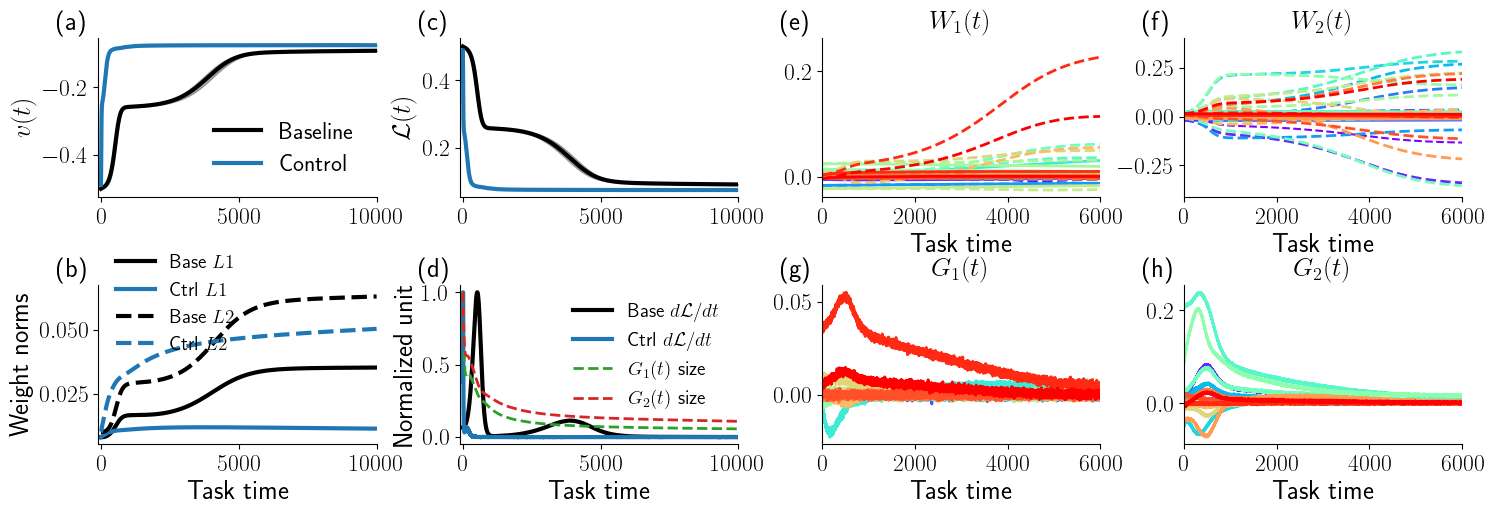

In [3]:
mnist_dir_list = glob.glob("../results/single_task_no_cost/run_id_*_MNIST*")
results = []
for result_dir in mnist_dir_list:
    results.append(ResultsManager(result_dir))

figsize = np.array((16, 6/5*4))*1.1
fontsize = 19
reduce_fontsize = 5
# weight_norm_ylim = (0, 0.1)
weight_legend_pos = (0, 1.3)

f = plt.figure(figsize=figsize)
hspace = 0.55
gs = mpl.gridspec.GridSpec(2, 4, wspace=0.3, hspace=hspace) 

ax_0 = f.add_subplot(gs[0, 0])  
ax_1 = f.add_subplot(gs[0, 1])  
ax_2 = f.add_subplot(gs[1, 0])  
ax_3 = f.add_subplot(gs[1, 1])
ax0 = f.add_subplot(gs[0, 2])  # full first row
ax1 = f.add_subplot(gs[0, 3])
ax2 = f.add_subplot(gs[1, 2])  # second row, first col
ax3 = f.add_subplot(gs[1, 3])


ax = np.array([ax_0, ax_1, ax_2, ax_3])

subplot_labels = np.array([["(a)", "(c)"], ["(b)", "(d)"]])
subplot_labels = subplot_labels.flatten()

ax = single_task_plot(results, ax=ax, fontsize=fontsize, line_width=3, x_lim=(-100, 10000), 
                      skip_xlabel=True, label_in_title=False, subplot_labels=subplot_labels,
                      reduce_fontsize=reduce_fontsize, weight_legend_pos=weight_legend_pos)

results_path = "../results/single_task_no_cost/run_id_0_MNIST_05-08-2023_22-44-11-966"
result_manager = ResultsManager(results_path)
print(result_manager.params["model_params"])
ax_2 = np.array([ax0, ax1, ax2, ax3])

figsize = (16, 6/5*2)
fontsize = 19
line_width = 2
n_weights = 20
subplot_labels = np.array([["(e)", "(f)"], ["(g)", "(h)"]])
subplot_labels = subplot_labels.flatten()
xlim = (0, 6000)

ax_2 = two_layer_parameters_plot(result_manager, figsize=figsize, fontsize=fontsize, line_width=line_width, 
                                 n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim, ax=ax_2)